# Homework Assignment  6

## Q1

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


### Preperations:

In [1]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
! mkdir -f ./datasets/amazon_reviews

!kaggle datasets download snap/amazon-fine-food-reviews  -p ./datasets/amazon_reviews
!unzip ./datasets/amazon_reviews/*.zip  -d ./datasets/amazon_reviews

     |████████████████████████████████| 92.0 MB 10 kB/s 
     |████████████████████████████████| 3.5 MB 40.9 MB/s 
     |████████████████████████████████| 86.4 MB 20 kB/s 
     |████████████████████████████████| 322 kB 63.2 MB/s 
     |████████████████████████████████| 3.6 MB 50.3 MB/s 
     |████████████████████████████████| 18.3 MB 174 kB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 2.9 MB 26.5 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 3.8 MB 54.8 MB/s 
     |████████████████████████████████| 449 kB 17.3 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=1392db6adff8fbe80150402699864c08d133ed636d8616d9bf10155aaa978e4d
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=e78f6dbd9a5

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 6.6 MB/s 
     |████████████████████████████████| 15.7 MB 24.7 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=dd424a6ed7eb108ae3359f480da81101c8885f4c293bd457d9abdd81947c94b5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account a

     |████████████████████████████████| 52 kB 848 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=7435d095543143342643477e64293cdb649c0b40adf22717d173880c0530858c
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn
mkdir: invalid option -- 'f'
Try 'mkdir --help' for more information.
 99% 240M/242M [00:01<00:00, 142MB/s]
100% 242M/242M [00:01<00:00, 129MB/s]
Archive:  ./datasets/amazon_reviews/amazon-fine-food-reviews.zip
  inflating: ./datasets/amazon_reviews/Reviews.csv  
  inflating: ./datasets/amazon_reviews/database.sqlite  
  inflating: ./datasets/amazon_reviews/hashes.txt  


In [1]:
# IMPORTS
import os
import json
import re
import requests
from typing import *
import numpy as np
import pandas as pd
import turicreate as turi
import networkx as ntkx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 

%matplotlib inline

In [2]:
reviews_sframe = turi.SFrame.read_csv('/content/datasets/amazon_reviews/Reviews.csv')
reviews_sframe

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon_reviews/Reviews.csv

Parsing completed. Parsed 100 lines in 0.91869 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 73137

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unable to interpret "encouraged him to eat" as a integer
Parse failed at token ending at: 
	encouraged him to eat,^ again.  It is also low in fat which is what he 
Successfully parsed 0 tokens:

Unable to interpret "aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product." as a integer
Parse failed at token ending at: 
	aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product.^
Successfully parsed 0 tokens:

Unexpected characters after last column. "B000GW6786"
Parse failed at token ending at: 
	yself that tastes much better than this."
415822,B000GW6786,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 415821
	1: B000GW6786
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
415822

Unable to interpret "no carbonation.  Great for dieters who don't want the calories but are sick of the flavor of water.  The Cherry mint ha a nice flavor with a hint of cherry.  Delicious."
514288" as a integer
Parse failed at token ending at: 
	ha a nice flavor with a hint of cherry.  Delicious."
514288,^B0081X097M,A1YN5RSMH6TTZP,ltgr;blu,0,0,5,1332979
Successfully parsed 4 tokens: 
	0: 514285
	1: B0081X097M
	2: ATO7WKMVJD6XQ
	3: "Curcio "" ... tives.Plus

9 lines failed to parse correctly

Finished parsing file /content/datasets/amazon_reviews/Reviews.csv

Parsing completed. Parsed 289205 lines in 2.66604 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


### Q1 ans:

In [3]:
# creating the features sframe from the review text field
reviews_features_sframe = turi.SFrame()
# removing all stop words as they are usually not very informative
reviews_features_sframe['text_words_1grams'] = turi.text_analytics.count_ngrams(reviews_sframe['Text'], n=1, method='word').dict_trim_by_keys(turi.text_analytics.stop_words(), True)
reviews_features_sframe['summary_words_1grams'] = turi.text_analytics.count_ngrams(reviews_sframe['Summary'], n=1, method='word').dict_trim_by_keys(turi.text_analytics.stop_words(), True)
reviews_features_sframe['text_words_2grams'] = turi.text_analytics.count_ngrams(reviews_sframe['Text'], n=2, method='word').dict_trim_by_keys(turi.text_analytics.stop_words(), True)
reviews_features_sframe['summary_words_2grams'] = turi.text_analytics.count_ngrams(reviews_sframe['Summary'], n=2, method='word').dict_trim_by_keys(turi.text_analytics.stop_words(), True)

reviews_features_sframe['helpfulness_score'] = np.divide(reviews_sframe['HelpfulnessNumerator'].to_numpy(), reviews_sframe['HelpfulnessDenominator'].to_numpy(), where=reviews_sframe['HelpfulnessDenominator'].to_numpy()!=0) 
# i created a classifier that predicts the score from 1 to 5 (not only 1 OR 5).
reviews_features_sframe['class'] = reviews_sframe['Score']
reviews_features_sframe

text_words_1grams,summary_words_1grams,text_words_2grams,summary_words_2grams
"{'appreciates': 1,'labrador': 1, 'smells': ...","{'food': 1, 'dog': 1,'quality': 1, 'good': 1} ...","{'more like': 1, 'foodproducts': 1, 'a stew': ...","{'dog food': 1, 'qualitydog': 1, 'good quality': ..."
"{'intended': 1, 'salted':1, 'product': 2, ...",{'advertised': 1},"{'the product': 1,'represent the': 1, 'to ...","{'as advertised': 1, 'notas': 1} ..."
"{'sisters': 1, 'brother':1, 'selling': 1, ...",{'delight': 1},"{'to the': 1, 'brotherand': 1, 'out his': 1, ...","{'it all': 1, 'says it':1, 'delight says': 1} ..."
"{'medicinal': 1,'flavor': 1, 'soda': 1, ...","{'medicine': 1, 'cough':1} ...","{'is very': 1, 'sodathe': 1, 'cherry soda': ...",{'cough medicine': 1}
"{'deal': 1, 'lover': 1,'quick': 1, 'delivery': ...","{'taffy': 1, 'great': 1}","{'lover this': 1, 'awide': 1, 'a deal': 1, ...",{'great taffy': 1}
"{'treat': 1,'delightful': 1, ...","{'taffy': 1, 'nice': 1}","{'delightful treat': 1,'recommend this': 1, ...",{'nice taffy': 1}
"{'themed': 1, 'served':1, 'beach': 1, ...","{'brands': 1,'expensive': 1, 'good': ...","{'loved it': 1, 'everyoneloved': 1, 'and ...","{'expensive brands': 1,'good as': 1, 'the ..."
"{'recommend': 1,'amazing': 1, ...","{'tasty': 1, 'taffy': 1,'wonderful': 1} ...","{'and chewy': 1, 'verysatisfying': 1, 'this ...","{'tasty taffy': 1,'wonderful tasty': 1} ..."
"{'rye': 1, 'cats': 1,'eat': 1, 'sprouting' ...","{'barley': 1, 'yay': 1}","{'rye too': 1, 'and rye':1, 'with wheatgrass': 1, ...",{'yay barley': 1}
"{'feeding': 1,'required': 1, 'eats' ...","{'food': 1, 'dog': 1,'healthy': 1} ...","{'every feeding': 1,'their digestion': 1, ...","{'dog food': 1, 'healthydog': 1} ..."


In [ ]:
train, test = reviews_features_sframe.random_split(0.8)
cls = turi.classifier.create(train,features=['text_words_1grams', 'summary_words_1grams', 'text_words_2grams', 'summary_words_2grams', 'helpfulness_score'], target="class", verbose=True)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 219199

Number of classes           : 5

Number of feature columns   : 5

Number of unpacked features : 1910476

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 13.415158    | 0.667590          | 0.665598            | 1.356354          | 1.356407            |

| 2         | 26.562464    | 0.666458          | 0.664644            | 1.221753          | 1.223383            |

| 3         | 39.926669    | 0.668000          | 0.667245            | 1.136334          | 1.138211            |

| 4         | 53.411480    | 0.671312          | 0.668458            | 1.074668          | 1.077847            |

| 5         | 66.691353    | 0.672530          | 0.668978            | 1.028406          | 1.031790            |

| 7         | 93.529769    | 0.675085          | 0.672272            | 0.970154          | 0.975645            |

| 8         | 106.812830   | 0.677097          | 0.674959            | 0.950611          | 0.957465            |

| 9         | 120.068893   | 0.679077          | 0.676519            | 0.933468          | 0.941414            |

| 10        | 133.280654   | 0.682115          | 0.679466            | 0.919031          | 0.928308            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 219199

Number of classes           : 5

Number of feature columns   : 5

Number of unpacked features : 1910476

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 11.236993    | 0.665961          | 0.664211            | 1.046619          | 1.049450            |

| 2         | 21.782073    | 0.664579          | 0.663777            | 1.031280          | 1.032030            |

| 3         | 32.477308    | 0.664346          | 0.664471            | 1.029392          | 1.028429            |

| 4         | 42.900660    | 0.664720          | 0.663517            | 1.028613          | 1.028050            |

| 5         | 53.368017    | 0.664930          | 0.664558            | 1.027992          | 1.027480            |

| 7         | 74.121935    | 0.665395          | 0.664904            | 1.027561          | 1.027401            |

| 8         | 84.545697    | 0.664706          | 0.664644            | 1.027337          | 1.027018            |

| 9         | 95.003526    | 0.664693          | 0.665511            | 1.027405          | 1.027097            |

| 10        | 105.521127   | 0.664383          | 0.666031            | 1.026837          | 1.026749            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 219199

Number of classes           : 5

Number of feature columns   : 5

Number of unpacked features : 1910476

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 13.032796    | 0.667590          | 0.665598            | 1.035367          | 1.036734            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 219199

Number of classes           : 5

Number of feature columns   : 5

Number of unpacked features : 1910476

Number of coefficients      : 7641908

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 8.880357     | 0.638931          | 0.640981            |

In [ ]:
# evaluating the classifier
cls_eval_results = cls.evaluate(test)

cls_summary_dict = cls.summary('dict')
classifier_algorithm = ''.join([x for x in str(type(cls)).split('.')[-1] if x.isalpha()])
test_f1_score, test_size = cls_eval_results['f1_score'], len(test)
validation_score = dict(cls_summary_dict['sections'][1])['Validation accuracy']

## Q2

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

### Preperations:

In [ ]:
! pip install turicreate
! pip install kaggle 
! pip install gensim
! pip install pyLDAvis
! pip install spaCy
! pip install afinn
! pip install textblob

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
! mkdir -f ./datasets/amazon_reviews

! kaggle datasets download snap/amazon-fine-food-reviews  -p ./datasets/amazon_reviews
! unzip ./datasets/amazon_reviews/*.zip  -d ./datasets/amazon_reviews

In [ ]:
# IMPORTS
import os
import json
import re
import requests
from typing import *
import numpy as np
import pandas as pd
import turicreate as turi
import networkx as ntkx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 
from textblob import TextBlob
from afinn import Afinn


%matplotlib inline

In [ ]:
org_reviews_sframe = turi.SFrame.read_csv('/content/datasets/amazon_reviews/Reviews.csv')
org_reviews_sframe

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon_reviews/Reviews.csv

Parsing completed. Parsed 100 lines in 1.21643 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 49415.3

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amazon_reviews/Reviews.csv

Parsing completed. Parsed 260995 lines in 3.89019 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


### Q2 ans:

In [ ]:
# we will extract the following features using textblob:
# Counter of nouns in review's text & summary
# sentiment polarity in review's text & summary
# sentiment subjectivity in review's text & summary
# and the following features using affin:
# Afinn sentiment score for review's text & summary

# creating the features sframe from the review text & summary fields
reviews_textblob_and_afinn_features_sframe = turi.SFrame()
features_list = [
                 'TextBlob text polarity', 
                 'TextBlob text subjectivity', 
                 'TextBlob summary polarity', 
                 'TextBlob summary subjectivity', 
                 'Afinn text score', 
                 'Afinn summary score'
                 ]
# TextBlob features
reviews_textblob_and_afinn_features_sframe['TextBlob text polarity'] = org_reviews_sframe['Text'].apply(lambda review: TextBlob(review).sentiment.polarity)
reviews_textblob_and_afinn_features_sframe['TextBlob text subjectivity'] = org_reviews_sframe['Text'].apply(lambda review: TextBlob(review).sentiment.subjectivity)
reviews_textblob_and_afinn_features_sframe['TextBlob summary polarity'] = org_reviews_sframe['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
reviews_textblob_and_afinn_features_sframe['TextBlob summary subjectivity'] = org_reviews_sframe['Summary'].apply(lambda review: TextBlob(review).sentiment.subjectivity)
# Afinn features
afinn = Afinn()
reviews_textblob_and_afinn_features_sframe['Afinn text score'] = org_reviews_sframe['Text'].apply(lambda t: afinn.score(t))
reviews_textblob_and_afinn_features_sframe['Afinn summary score'] = org_reviews_sframe['Summary'].apply(lambda t: afinn.score(t))


# i created a classifier that predicts the score from 1 to 5 (not only 1 OR 5).
reviews_textblob_and_afinn_features_sframe['class'] = org_reviews_sframe['Score']

In [ ]:
train, test = reviews_textblob_and_afinn_features_sframe.random_split(0.8)
cls_with_sentiment_analysis_features = turi.classifier.create(train,features=features_list, target="class", verbose=True)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 198672

Number of classes           : 5

Number of feature columns   : 6

Number of unpacked features : 6

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.745158     | 0.679809          | 0.675337            | 1.322449          | 1.325751            |

| 2         | 1.464348     | 0.680795          | 0.675911            | 1.175785          | 1.181128            |

| 3         | 2.187504     | 0.681757          | 0.675815            | 1.084783          | 1.092162            |

| 4         | 2.916014     | 0.682144          | 0.676772            | 1.024796          | 1.033738            |

| 5         | 3.641679     | 0.682235          | 0.676580            | 0.982891          | 0.993245            |

| 10        | 7.248380     | 0.684490          | 0.678589            | 0.895955          | 0.911279            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 198672

Number of classes           : 5

Number of feature columns   : 6

Number of unpacked features : 6

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.612387     | 0.676064          | 0.669504            | 0.982619          | 0.995099            |

| 2         | 1.207071     | 0.673064          | 0.666826            | 0.986463          | 0.997451            |

| 3         | 1.767622     | 0.675002          | 0.669886            | 0.983303          | 0.994822            |

| 4         | 2.336188     | 0.677438          | 0.672277            | 0.978465          | 0.989797            |

| 5         | 2.923112     | 0.677791          | 0.672373            | 0.977821          | 0.988875            |

| 10        | 5.806054     | 0.679134          | 0.674668            | 0.974635          | 0.985283            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 198672

Number of classes           : 5

Number of feature columns   : 6

Number of unpacked features : 6

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.734106     | 0.679809          | 0.675337            | 0.971122          | 0.983320            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 198672

Number of classes           : 5

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients      : 28

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.959529     | 0.669833          | 0.663479            |

| 2         | 3        | 1.520330     | 0.641696          | 0.638615            |

| 3         | 4        | 2.096055     | 0.676004          | 0.671703            |

| 4         | 5        | 2.655739     | 0.676094          | 0.671129            |

| 5         | 6        | 3.216826     | 0.676039          | 0.671321            |

| 6         | 7        | 3.782297     | 0.676039          | 0.671321            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.6785885053074495
PROGRESS: RandomForestClassifier          : 0.6746676867170317
PROGRESS: DecisionTreeClassifier          : 0.6753370947690542
PROGRESS: LogisticClassifier              : 0.6713206464569188
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [ ]:
# evaluating the classifier
cls_with_sentiment_analysis_features_eval_results = cls_with_sentiment_analysis_features.evaluate(test)

cls_with_sentiment_analysis_features_summary_dict = cls_with_sentiment_analysis_features.summary('dict')
classifier_algorithm = ''.join([x for x in str(type(cls_with_sentiment_analysis_features_eval_results)).split('.')[-1] if x.isalpha()])
test_f1_score, test_size = cls_with_sentiment_analysis_features_eval_results['f1_score'], len(test)
validation_score = dict(cls_with_sentiment_analysis_features_summary_dict['sections'][1])['Validation accuracy']

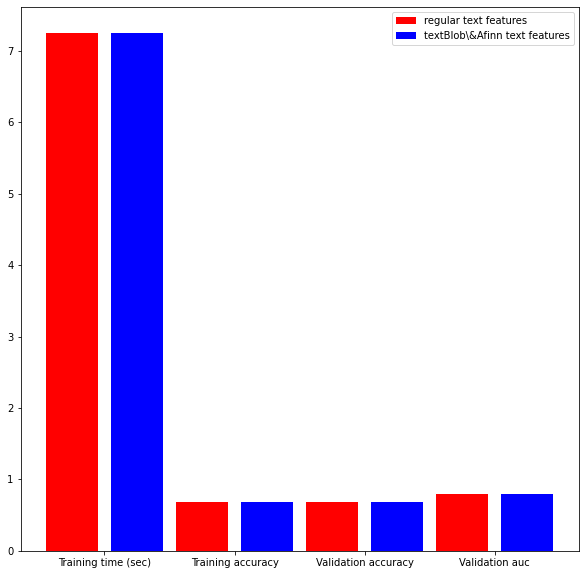

In [ ]:
# comparing the two classifiers
fig, ax = plt.subplots(figsize=(10,10))
# take the following score values from each evaluation dictionaries: 'Training time (sec)' , 'Training accuracy', 'Validation accuracy', 'Validation auc'
scores_to_collect = ['Training time (sec)' , 'Training accuracy', 'Validation accuracy', 'Validation auc']
cls_evalution_dictionaries_to_collect_from = [dict(cls_summary_dict['sections'][1]), dict(cls_with_sentiment_analysis_features_summary_dict['sections'][1])]
regular_text_analysis_scores = []
text_blob_and_affin_scores = []
for score_to_collect in scores_to_collect:
  regular_text_analysis_scores.append(cls_evalution_dictionaries_to_collect_from[0][score_to_collect])
  text_blob_and_affin_scores.append(cls_evalution_dictionaries_to_collect_from[1][score_to_collect])

x_ticks = np.arange(0, len(scores_to_collect)*2, 2) 

ax.bar(x_ticks-0.5, regular_text_analysis_scores,color='red', label = 'regular text features')
ax.bar(x_ticks+0.5, text_blob_and_affin_scores,color='blue', label = 'textBlob\&Afinn text features')

ax.set_xticks(x_ticks)
ax.set_xticklabels(scores_to_collect)

ax.legend()
plt.show()

## Q3

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

### Preperations:

In [ ]:
! pip install turicreate
! pip install kaggle 
! pip install gensim
! pip install pyLDAvis
! pip install spaCy
! pip install afinn
! pip install textblob

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
! mkdir -f ./datasets/employees_reviews

! kaggle datasets download petersunga/google-amazon-facebook-employee-reviews  -p ./datasets/employees_reviews
! unzip ./datasets/employees_reviews/*.zip  -d ./datasets/employees_reviews

In [ ]:
# IMPORTS
import os
import json
import re
import requests
from typing import *
import numpy as np
import pandas as pd
import turicreate as turi
import networkx as ntkx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 
from textblob import TextBlob
from afinn import Afinn


%matplotlib inline

In [ ]:
#  i will use the employee review dataset
employees_reviews_sframe = turi.SFrame.read_csv("./datasets/employees_reviews/employee_reviews.csv", na_values=['none'])
employees_reviews_sframe

In [ ]:
# i will use the spacy library to import a word->embedding dictionary 
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

### Q3 ans:

In [ ]:
spacy_word_to_tokens = spacy.load('en_core_web_lg')
employees_reviews_embeddings_sframe = turi.SFrame()

main_text_field = 'Review'

l = []
for i in tqdm(range(len(sf))):
    text = sf[i][main_text_field]
    l.append(nlp(text).vector)

employees_reviews_embeddings_sframe['word_embeddings'] = l 
employees_reviews_embeddings_sframe['class'] = employees_reviews_sframe['class']

# addings additional features:
employees_reviews_embeddings_sframe['words_1grams'] = tc.text_analytics.count_ngrams(employees_reviews_sframe[main_text_field], n=1, method='word')
employees_reviews_embeddings_sframe['words_2grams'] = tc.text_analytics.count_ngrams(employees_reviews_sframe[main_text_field], n=2, method='word')
# TextBlob features
employees_reviews_embeddings_sframe['TextBlob text polarity'] = employees_reviews_sframe[main_text_field].apply(lambda review: TextBlob(review).sentiment.polarity)
employees_reviews_embeddings_sframe['TextBlob text subjectivity'] = employees_reviews_sframe[main_text_field].apply(lambda review: TextBlob(review).sentiment.subjectivity)
# employees_reviews_embeddings_sframe['TextBlob summary polarity'] = employees_reviews_sframe['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
# employees_reviews_embeddings_sframe['TextBlob summary subjectivity'] = employees_reviews_sframe['Summary'].apply(lambda review: TextBlob(review).sentiment.subjectivity)
# Afinn features
afinn = Afinn()
employees_reviews_embeddings_sframe['Afinn text score'] = employees_reviews_sframe[main_text_field].apply(lambda t: afinn.score(t))
# employees_reviews_embeddings_sframe['Afinn summary score'] = employees_reviews_sframe['Summary'].apply(lambda t: afinn.score(t))


features_list = ['word_embeddings', 'words_1grams', 'words_2grams', 'TextBlob text polarity', 'TextBlob text subjectivity', 'Afinn text score']

In [ ]:
# training and evaluating the classifier with only word embeddings as features.
# splitting and training
train, test = employees_reviews_embeddings_sframe.random_split(0.8)
cls_with_embeddings_only = turi.classifier.create(train, features=['word_embeddings'], target="class", verbose=True)
cls_with_additional_features = turi.classifier.create(train, features=features_list, target="class", verbose=True)
# evaluating the classifier
cls_with_embeddings_only_eval_results = cls_with_embeddings_only.evaluate(test)
cls_with_additional_features_eval_results = cls_with_additional_features.evaluate(test)

As can be seen from the results, adding features to the embeddings XXXXXX

In [ ]:
# comparing the two classifiers
fig, ax = plt.subplots(figsize=(10,10))
# take the following score values from each evaluation dictionaries: 'Training time (sec)' , 'Training accuracy', 'Validation accuracy', 'Validation auc'
scores_to_collect = ['Training time (sec)' , 'Training accuracy', 'Validation accuracy', 'Validation auc']
cls_evalution_dictionaries_to_collect_from = [dict(cls_with_embeddings_only_eval_results['sections'][1]), dict(cls_with_additional_features_eval_results['sections'][1])]
regular_text_analysis_scores = []
text_blob_and_affin_scores = []
for score_to_collect in scores_to_collect:
  regular_text_analysis_scores.append(cls_evalution_dictionaries_to_collect_from[0][score_to_collect])
  text_blob_and_affin_scores.append(cls_evalution_dictionaries_to_collect_from[1][score_to_collect])

x_ticks = np.arange(0, len(scores_to_collect)*2, 2) 

ax.bar(x_ticks-0.5, regular_text_analysis_scores,color='red', label = 'Only embeddings as features')
ax.bar(x_ticks+0.5, text_blob_and_affin_scores,color='blue', label = 'Additional features')

ax.set_xticks(x_ticks)
ax.set_xticklabels(scores_to_collect)

ax.legend()
plt.show()